In [1]:
%matplotlib inline

import os
import glob
import re

import arviz as az
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr

plt.style.use("./paper.mplstyle")

In [2]:
samp_df_files = glob.glob("../results/sample_size/sim/*.tsv")
samp_df_files
samp_regex = re.compile("../results/sample_size/sim/sim_counts.num_samps_(\d+).tsv")

samp_df_files = sorted(samp_df_files, key=lambda x: int(samp_regex.search(x).groups()[0]))
samp_dict = dict()
for f in samp_df_files:
    num_samps = samp_regex.search(f).groups()[0]
    _df = pd.read_table(f, index_col=0, sep="\t")
    _df["depth"] = np.exp(_df["log_depth"])
    samp_dict[num_samps] = _df

In [3]:
beta_var_df = pd.read_table("../results/sample_size/post_beta_var_df.tsv", sep="\t", index_col=0)
order = list(map(str, sorted(beta_var_df["sample_size"].unique())))
beta_var_df["sample_size"] = pd.Categorical(beta_var_df["sample_size"].astype(str),
                                            categories=order,
                                            ordered=True)
beta_var_df = beta_var_df.query("column == 'beta_case'")
print(beta_var_df.shape)
beta_var_df.head()

(14000, 3)


,sample_size,column,value
2000,100,beta_case,0.976039
2001,100,beta_case,0.421428
2002,100,beta_case,3.086260
2003,100,beta_case,2.624290
2004,100,beta_case,3.199820


In [4]:
order

['50', '100', '200', '500', '1000', '5000', '10000']

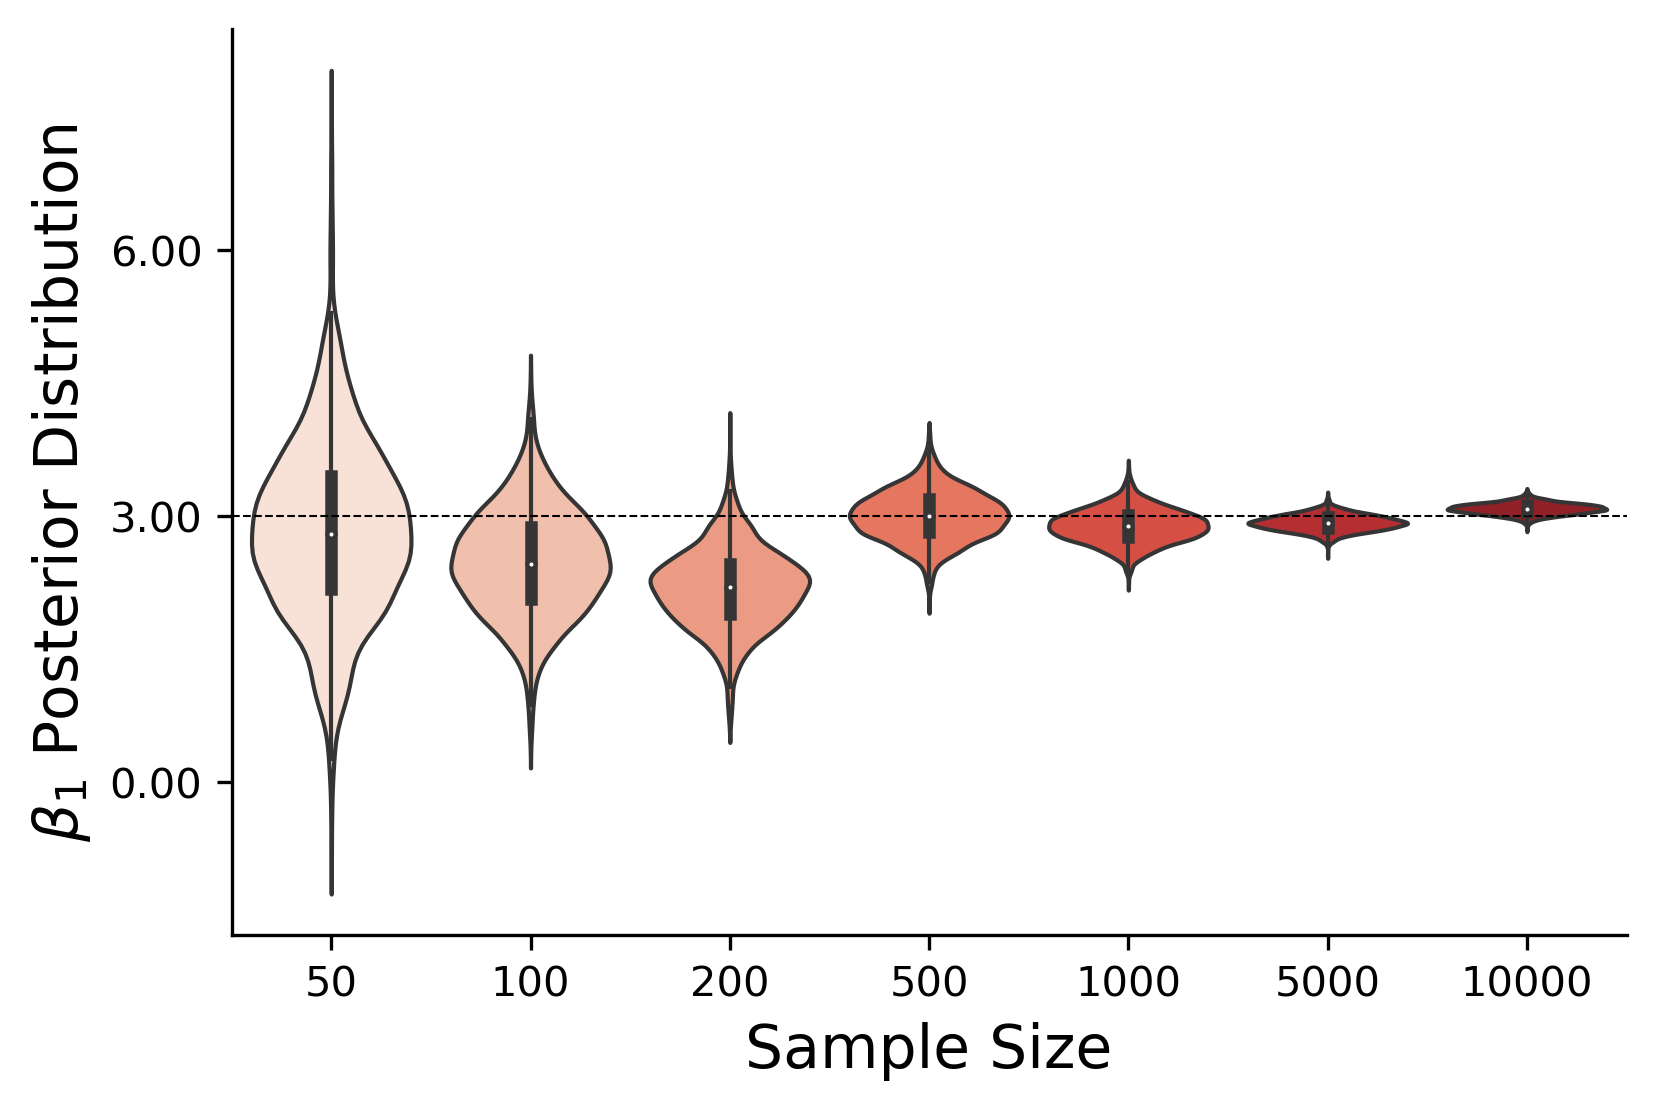

In [6]:
import matplotlib.ticker as ticker
from matplotlib.patches import Patch

fig, ax = plt.subplots(1, 1)
palette = dict(zip(
    order,
    sns.color_palette("Reds", len(order))
))

true_val = 3

violin_args = {
    "x": "sample_size",
    "y": "value",
    "palette": palette,
    "linewidth": 1, 
    "scale": "width"
}
sns.violinplot(
    data=beta_var_df,
    ax=ax,
    **violin_args,
)
ax.axhline(true_val, color="black", ls="--", lw=0.5)
ax.set_xlabel("Sample Size", fontsize="x-large")
ax.set_ylabel(r"$\beta_1$ Posterior Distribution", fontsize="x-large")

ax.yaxis.set_major_locator(ticker.MaxNLocator(4))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.2f"))

plt.savefig("../figures/simulation/sample_size_uncertainty_beta_1.pdf")
plt.show()